In [118]:
import arff,numpy as np
dataset=arff.load(open('student.arff'))
mydata=np.array(dataset['data'])

In [119]:
import pandas as pd
df=pd.DataFrame(mydata)

In [120]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15.0,16.0,2.0,20.0,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20.0,20.0,3.0,25.0,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10.0,7.0,0.0,30.0,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30.0,25.0,5.0,35.0,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40.0,50.0,12.0,50.0,No,Bad,Above-7,M


In [121]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
dfle=df
dfle[0]=le.fit_transform(dfle[0])

In [122]:
dfle.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
475,0,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,5.0,4.0,5.0,8.0,No,Bad,Above-7,L
476,0,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Father,50.0,77.0,14.0,28.0,No,Bad,Under-7,M
477,0,Jordan,Jordan,MiddleSchool,G-08,A,Geology,S,Father,55.0,74.0,25.0,29.0,No,Bad,Under-7,M
478,0,Jordan,Jordan,MiddleSchool,G-08,A,History,F,Father,30.0,17.0,14.0,57.0,No,Bad,Above-7,L
479,0,Jordan,Jordan,MiddleSchool,G-08,A,History,S,Father,35.0,14.0,23.0,62.0,No,Bad,Above-7,L


In [123]:
for i in range(1,9):
    dfle[i]=le.fit_transform(dfle[i])

In [124]:
for i in range(13,17):
    dfle[i]=le.fit_transform(dfle[i])

In [125]:
dfle.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
475,0,3,3,1,5,0,2,1,0,5.0,4.0,5.0,8.0,0,0,0,1
476,0,3,3,1,5,0,5,0,0,50.0,77.0,14.0,28.0,0,0,1,2
477,0,3,3,1,5,0,5,1,0,55.0,74.0,25.0,29.0,0,0,1,2
478,0,3,3,1,5,0,6,0,0,30.0,17.0,14.0,57.0,0,0,0,1
479,0,3,3,1,5,0,6,1,0,35.0,14.0,23.0,62.0,0,0,0,1


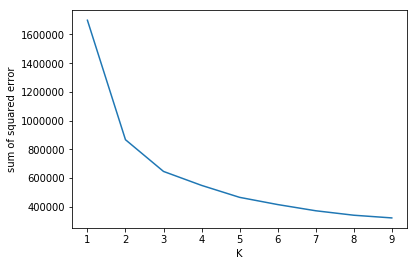

In [126]:
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
%matplotlib inline
sse=[]
k_range=range(1,10)
for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit(df[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]])
    sse.append(km.inertia_)
plt.xlabel('K')
plt.ylabel('sum of squared error')
plt.plot(k_range,sse)

In [127]:
km=KMeans(n_clusters=2)

In [128]:
y_predicted=km.fit_predict(df[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]])
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [129]:
dfle['cluster']=y_predicted

In [130]:
dfle.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,cluster
0,1,4,4,2,1,0,7,0,0,15.0,16.0,2.0,20.0,1,1,1,2,1
1,1,4,4,2,1,0,7,0,0,20.0,20.0,3.0,25.0,1,1,1,2,1
2,1,4,4,2,1,0,7,0,0,10.0,7.0,0.0,30.0,0,0,0,1,1
3,1,4,4,2,1,0,7,0,0,30.0,25.0,5.0,35.0,0,0,0,1,1
4,1,4,4,2,1,0,7,0,0,40.0,50.0,12.0,50.0,0,0,0,2,1


In [131]:
km.cluster_centers_

array([[ 0.55597015,  4.44402985,  4.49626866,  1.27985075,  3.19402985,
         0.43283582,  4.92164179,  0.57089552,  0.58208955, 68.58955224,
        79.56716418, 52.89552239, 50.81343284,  0.73880597,  0.76492537,
         0.81343284,  1.00746269],
       [ 0.73584906,  4.22169811,  4.27358491,  1.42924528,  2.54245283,
         0.52358491,  5.67924528,  0.38679245,  0.19339623, 19.19811321,
        23.48584906, 18.98584906, 33.76415094,  0.33962264,  0.41037736,
         0.33490566,  1.31603774]])

In [165]:
#if number of clusters is 2
c=cx=0
for i in dfle['cluster']:
    if i==0:
        c=c+1
    else:
        cx=cx+1
print("number of zeros",c)
print("number of ones",cx)

number of zeros 268
number of ones 212


In [166]:
km=KMeans(n_clusters=3)
y_predictedx=km.fit_predict(df[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]])
y_predictedx
dfle['clusterx']=y_predictedx

In [171]:
#if number of clusters is 3
c=cx=cy=0
for i in dfle['clusterx']:
    if i==0:
        c=c+1
    elif i==1:
        cx=cx+1
    else:
        cy=cy+1
print("number of ones= ",c)
print("number of zeros= ",cx)
print("number of twos= ",cy)

number of ones=  154
number of zeros=  190
number of twos=  136


In [172]:
dfle['cluster'].value_counts()

0    268
1    212
Name: cluster, dtype: int64

In [173]:
dfle['clusterx'].value_counts()

1    190
0    154
2    136
Name: clusterx, dtype: int64